## Assigment 3 
Karl-Axel Jönsson BME4

Theta is [[ 1.96120423]
 [-2.99599464]]


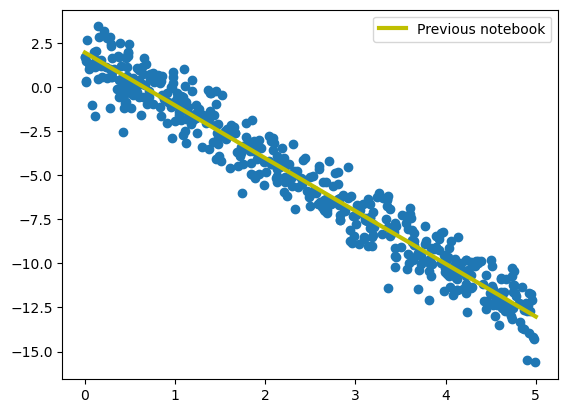

Theta with sklearn is  [[1.9612042305725321]
 [-2.995994644583082]]


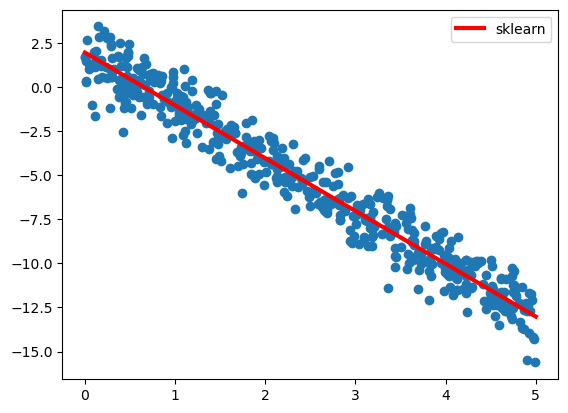

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Lets start by making a simple example
N = 500 # Number of datapoints
X = 5 *np.random.rand(N,1)
y =  2 - 3 * X + np.random.randn(N,1)

X_b = np.hstack((np.ones([N,1]),X))
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)

X_new=np.array([0,5])
X_new_b=np.array([[1,0],[1,5]])
y_hat=np.dot(X_new_b, theta)
print("Theta is",theta)
plt.plot(X_new, y_hat, 'y',label="Previous notebook", linewidth=3)
plt.scatter(X,y)
plt.legend(loc="best")
plt.show()

reg = LinearRegression().fit(X,y)
intercept=reg.intercept_
coef=reg.coef_
X_new=np.array([0,5])
X_new_b=np.array([[1,0],[1,5]])
theta_sklearn=np.array([intercept,coef],dtype=object)
y_hat=np.dot(X_new_b, theta_sklearn)
print("Theta with sklearn is ",theta_sklearn)
plt.plot(X_new, y_hat, 'r',label="sklearn", linewidth=3)
plt.scatter(X,y)
plt.legend(loc="best")
plt.show()

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Four features x1,x2,x3,x4 and two classes (binary classification)
X, y = make_classification(n_samples = 1000,n_features=4, n_classes = 2,random_state=0)
# Lets split the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train_i = np.c_[np.ones((np.shape(X_train)[0],1)),X_train] # Add 1 for intercept theta_0
X_test_i = np.c_[np.ones((np.shape(X_test)[0],1)),X_test] #Add 1 for intercept theta_0
theta = np.zeros((np.shape(X_train_i)[1])) # Intialize theta to zero

# Lets again use gradient descent to find the right values for theta
n_epochs = 20 # The number of epoch 
eta = 0.01 # Our learning rate
J = np.zeros(n_epochs)
for i in range(n_epochs):
    theta_T_X = np.dot(X_train_i, theta)  # X*theta
    #p_hat = 1 / (1 + np.exp(-theta_T_X))  # We pass this through the logistic function
    p_hat = np.exp(theta_T_X) / (1 + np.exp(theta_T_X))
    error = y_train - p_hat
    J[i] = np.sum(-(y_train*np.log(p_hat) + (1-y_train)*np.log(1-p_hat)))/len(y_train) 
    grad = np.dot(X_train_i.T, error)
    theta = theta + eta * grad
    
print("Theta is ",theta)
y_hat = 1 / (1 + np.exp(-np.dot(X_test_i, theta))) # Calculate probabilities using our thetas.
y_hat = np.round(y_hat) # Easy cheat instead of using if statements or similar
acc = np.sum(y_hat == y_test)/len(y_test) # Calculate accuracy
print(" and the accuracy is ",acc)

clf=LogisticRegression() #Easy cheat instead of using the code above ;)
clf.fit(X_train, y_train)
k=clf.coef_
m=clf.intercept_
k_list = np.squeeze(np.asarray(k))
theta_list=np.array([m[0],k_list[0],k_list[1],k_list[2],k_list[3]],dtype=object)
print("Sklearn theta is ",theta_list)
y_hat=clf.predict(X_test)
acc=accuracy_score(y_test,y_hat)
print("and the accuracy with sklearn is ",acc)

Theta is  [ 0.7932279   2.35863558 -0.06656008  1.07331921  1.68374101]
 and the accuracy is  0.956
Sklearn theta is  [0.7292977498533089 2.2226624322194346 -0.05164397115642876
 1.0024091082136621 1.5907854849198302]
and the accuracy with sklearn is  0.956
